In [1]:
# Libraries
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import fft, fftfreq, ifft, rfftfreq, rfft
from scipy.optimize import *
import pandas as pd
from scipy.signal import find_peaks, peak_widths
from scipy.optimize import curve_fit

In [6]:
# Get data from saved files
fnames = ['data/recording_2/EL_LOW_E.wav', 'data/recording_2/EL_LOW_G.wav', 'data/recording_2/EL_LOW_A.wav', 'data/recording_2/EL_LOW_C.wav', 'data/recording_2/EL_LOW_F.wav', 'data/recording_2/EL_MID_E.wav', 'data/recording_2/EL_MID_G.wav', 'data/recording_2/EL_MID_A.wav', 'data/recording_2/EL_MID_C.wav', 'data/recording_2/EL_MID_F.wav', 'data/recording_2/EL_HIGH_E.wav', 'data/recording_2/EL_HIGH_G.wav', 'data/recording_2/EL_HIGH_A.wav', 'data/recording_2/EL_HIGH_C.wav', 'data/recording_2/EL_HIGH_F.wav', 'data/recording_2/AC_LOW_E.wav', 'data/recording_2/AC_LOW_G.wav', 'data/recording_2/AC_LOW_A.wav', 'data/recording_2/AC_LOW_C.wav', 'data/recording_2/AC_LOW_F.wav', 'data/recording_2/AC_MID_E.wav', 'data/recording_2/AC_MID_G.wav', 'data/recording_2/AC_MID_A.wav', 'data/recording_2/AC_MID_C.wav', 'data/recording_2/AC_MID_F.wav', 'data/recording_2/AC_HIGH_E.wav', 'data/recording_2/AC_HIGH_G.wav', 'data/recording_2/AC_HIGH_A.wav', 'data/recording_2/AC_HIGH_C.wav', 'data/recording_2/AC_HIGH_F.wav']
data = np.load('data/analyzedWeek20/dataTable.npy')
data.shape

(30, 3, 12)

[0, 2000, 0, 1.2]

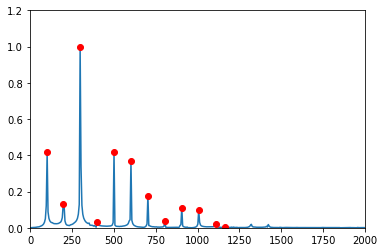

In [28]:
# Comparing a file
fileIdx = 16
frequencies, amplitudes, widths = data[fileIdx]
original = np.load('data/analyzedWeek20/AC_LOW_G.npz')
x, y = original[original.files[0]], original[original.files[1]]
plt.plot(x, y, frequencies, amplitudes, 'ro')
plt.axis([0, 2000, 0, 1.2])

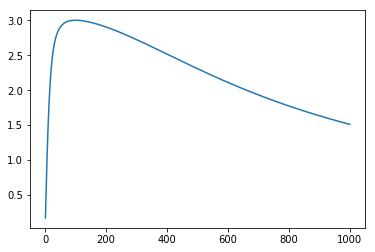

In [71]:
def createPeak(frequency, amp, width):
    f = 0.01 # Freq step
    x = np.arange(1, 1000, f)
    y = lambda t: amp * (1+(3/width**2) * (t / frequency - frequency / t) ** 2) ** -0.5
    return [x, list(map(y, x))]

# plt.plot(*createPeak(frequencies[2], amplitudes[2], widths[2]))
# widths[2]
x, y = createPeak(100, 3, 10)
plt.plot(x, y)